## **Predicting the Quarterly Net Income for Amazon**


In [8]:
# Importing Packages
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import matplotlib
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import matplotlib
import sklearn.preprocessing
from sklearn.metrics import r2_score
import keras

from keras.layers import Dense,Dropout,SimpleRNN,GRU, Bidirectional,LSTM
from tensorflow.keras.optimizers import SGD
from keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler, StandardScaler

plt.style.use('fivethirtyeight')
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [9]:
# Reading the Data
df=pd.read_excel('Amazon Quarterly Net Income.xlsx')
df.head()

,Date,Quarterly Net Income
0,2009-03-31,177
1,2009-06-30,142
2,2009-09-30,199
3,2009-12-31,384
4,2010-03-31,299


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  55 non-null     datetime64[ns]
 1   Quarterly Net Income  55 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1008.0 bytes


In [11]:
# Setting Date as Index
df = df.set_index('Date')
df.head()

,Quarterly Net Income
Date,
2009-03-31,177
2009-06-30,142
2009-09-30,199
2009-12-31,384
2010-03-31,299


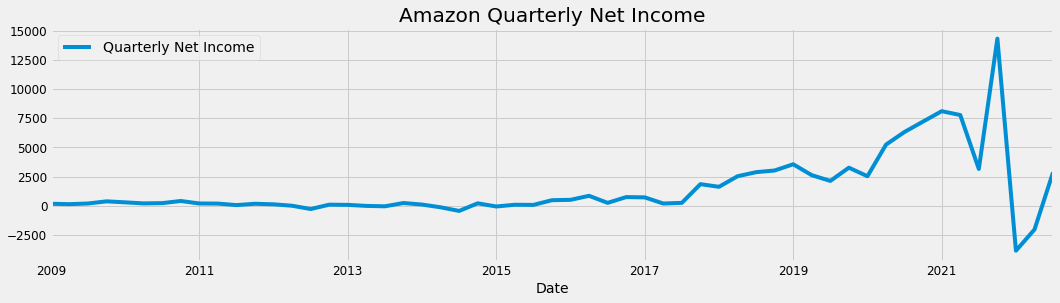

In [12]:
# Plotting the data
df.plot(figsize=(16,4),legend=True)
plt.title('Amazon Quarterly Net Income')
plt.show()

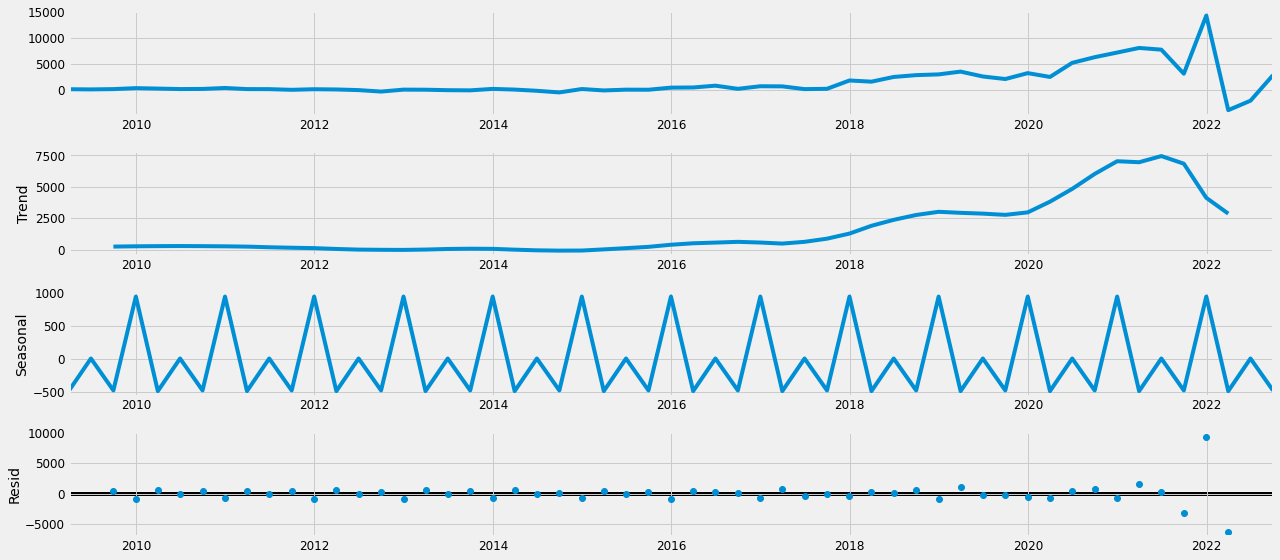

In [13]:
# Decomposition the data 
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8

decomposition = sm.tsa.seasonal_decompose(df, model = 'additive')
fig = decomposition.plot()
plt.show()

C:\Users\ravit\AppData\Local\Temp\ipykernel_9332\2151717043.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['train'] = train['Quarterly Net Income']
C:\Users\ravit\AppData\Local\Temp\ipykernel_9332\2151717043.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['test'] = test['Quarterly Net Income']


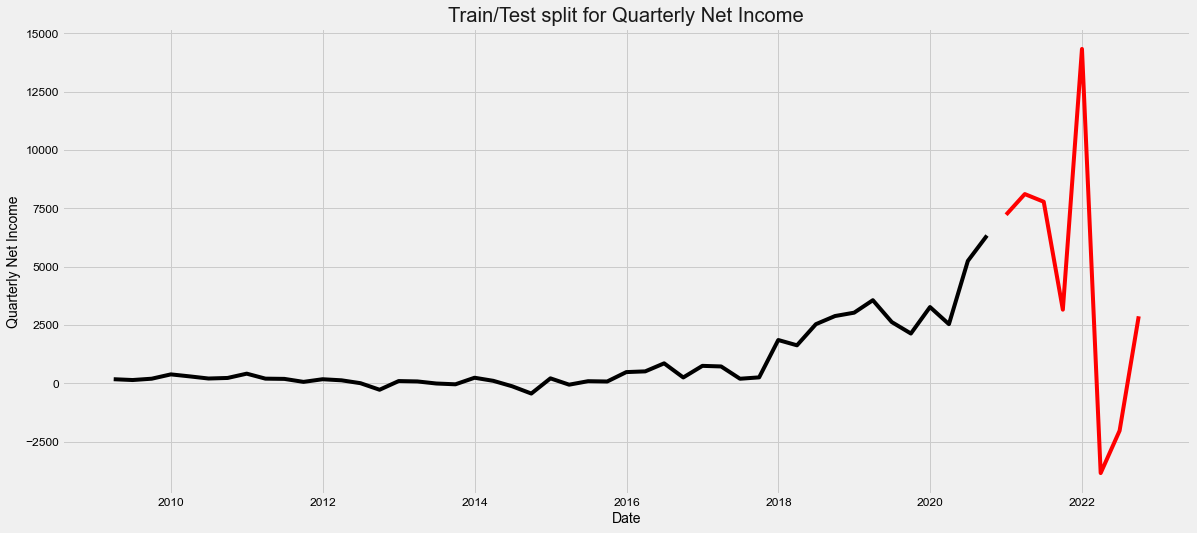

In [14]:
# Dividing the data into training and testing
# Ploting the data
import seaborn as sns 
df['Date'] = df.index
train = df[df['Date'] < pd.to_datetime("2020-12", format='%Y-%m')]
train['train'] = train['Quarterly Net Income']
del train['Date']
del train['Quarterly Net Income']
test = df[df['Date'] >= pd.to_datetime("2020-12", format='%Y-%m')]
del test['Date']
test['test'] = test['Quarterly Net Income']
del test['Quarterly Net Income']
plt.plot(train, color = "black")
plt.plot(test, color = "red")
plt.title("Train/Test split for Quarterly Net Income")
plt.ylabel("Quarterly Net Income")
plt.xlabel('Date')
sns.set()
plt.show()

## **Arima Model**

In [15]:
# Applying ARIMA Model
from pmdarima.arima import auto_arima
model = auto_arima(train, trace=True, error_action='ignore', suppress_warnings=True)
model.fit(train)
forecast = model.predict(n_periods=len(test))
forecast = pd.DataFrame(forecast,index = test.index,columns=['Prediction'])

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.55 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=723.843, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=725.025, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=725.129, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=724.038, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=726.967, Time=0.11 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 0.864 seconds


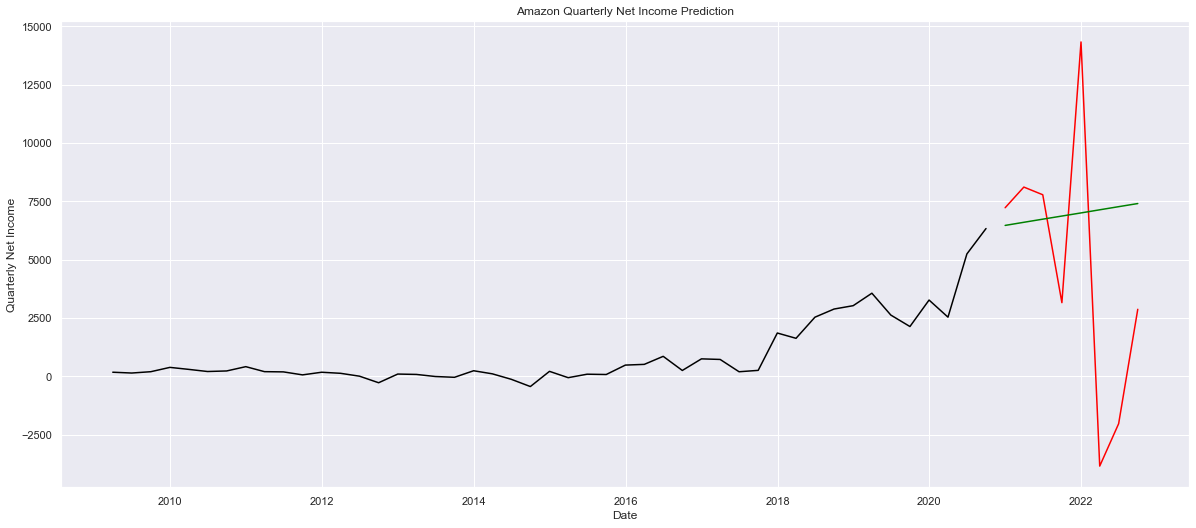

In [16]:
# Plotting the prediction
plt.plot(train, color = "black")
plt.plot(test, color = "red")
plt.plot(forecast, color = "green")
plt.title("Amazon Quarterly Net Income Prediction")
plt.ylabel("Quarterly Net Income")
plt.xlabel('Date')
sns.set()
plt.show()

In [17]:
from math import sqrt
from sklearn.metrics import mean_squared_error
rms = sqrt(mean_squared_error(test,forecast))
print("RMSE: ", rms)

RMSE:  6111.103976680451


## **SARIMA Model**

In [18]:
df=pd.read_excel('Amazon Quarterly Net Income.xlsx')
df = df.set_index('Date')

In [19]:
# set the typical ranges for p, d, q
p = d = q = range(0, 2)

#take all possible combination for p, d and q
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [20]:
# Using Grid Search find the optimal set of parameters that yields the best performance
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(df, order = param, seasonal_order = param_seasonal, enforce_stationary = False,enforce_invertibility=False) 
            result = mod.fit()   
            print('SARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, result.aic))
        except:
            continue

R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC w

SARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1045.8693541124176
SARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1042.071848863134
SARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:816.1166191693756


R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred f

SARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1470.3478781031708
SARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:1042.288844758553
SARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1043.4030457797937
SARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:814.4071561555569


R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals


SARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:1767.6384904727988
SARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1039.204696995177
SARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:1037.1070026589011
SARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:815.2363492015147


R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals


SARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:1919.9365204302735
SARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:1037.076480890552


R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided

SARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:1041.5649226155397
SARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:814.8304104160452


R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred f

SARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:1799.4728928830943
SARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:1023.8801090206067
SARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1025.7516484444118
SARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:809.7391363885864


R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive U

SARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:1784.9791670703282
SARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:1025.7467084760726
SARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:1027.8598499939121
SARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:810.1419319119694


R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided

SARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:1638.9020643329084
SARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:1000.5808842501942
SARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:1002.5805610724631
SARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:791.3234823687981
SARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:2004.1913740752475
SARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:1002.580608794294
SARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:1004.5759906772008


R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided

SARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:793.2504177946784


R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
R:\Anaconda\envs\general\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency informat

SARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:2143.9310332523696
SARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:1029.881751039156
SARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:1031.4194101820194
SARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:812.8216106331406


R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)


SARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:1865.73701770236
SARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:1031.4110549572415
SARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:1033.4076728801604


R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided

SARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:814.001614526459


R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)


SARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:8.0
SARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:1019.674384447333


R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information w

SARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:1021.6653618798966
SARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:808.8877388044048


R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information w

SARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:1878.5650647816083


R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


SARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:1021.6666423549927
SARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:1023.6445112431678


R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
R:\Anaconda\envs\general\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequen

SARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:812.3347020954619


R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC w

SARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:1007.0838127286339
SARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:1009.025757039628
SARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:796.8475127536705


R:\Anaconda\envs\general\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency informat

SARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:1861.6574635190523
SARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:1009.0335801706939
SARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:1011.0107658141576
SARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:798.6581098605293


R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
R:\Anaconda\envs\general\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency informat

SARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:1942.2977783212973
SARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:1002.1239984052268
SARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:1003.9002646716557
SARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:792.8355129684587


R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals


SARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:1996.9352356113595
SARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:1004.1239862528087
SARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:1006.1125151519901
SARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:794.8139491117365


R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided

SARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:1908.1269445169046


R:\Anaconda\envs\general\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [21]:
#Fitting the SARIMA model using above optimal combination of p, d, q (optimal means combination at which we got lowest AIC score)

model = sm.tsa.statespace.SARIMAX(df, order = (1, 1, 1),
                                  seasonal_order = (1, 1, 0, 12)
                                 )
result = model.fit()
print(result.summary().tables[1])

R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2281      0.292     -0.781      0.435      -0.800       0.344
ma.L1         -0.5631      0.466     -1.208      0.227      -1.477       0.351
ar.S.L12      -0.0901      1.084     -0.083      0.934      -2.215       2.035
sigma2      9.071e+06    1.1e+06      8.245      0.000    6.91e+06    1.12e+07


In [22]:
prediction = result.get_prediction(start = pd.to_datetime('2021-03-31'), dynamic = False)
prediction_ci = prediction.conf_int()
prediction_ci

,lower Quarterly Net Income,upper Quarterly Net Income
2021-03-31,367.936860,12174.322671
2021-06-30,1752.300168,13558.685979
2021-09-30,2388.203534,14194.589345
2021-12-31,1438.612959,13244.998769
2022-03-31,2467.783946,14274.169757
2022-06-30,566.712621,12373.098431
2022-09-30,-4248.722171,7557.663640


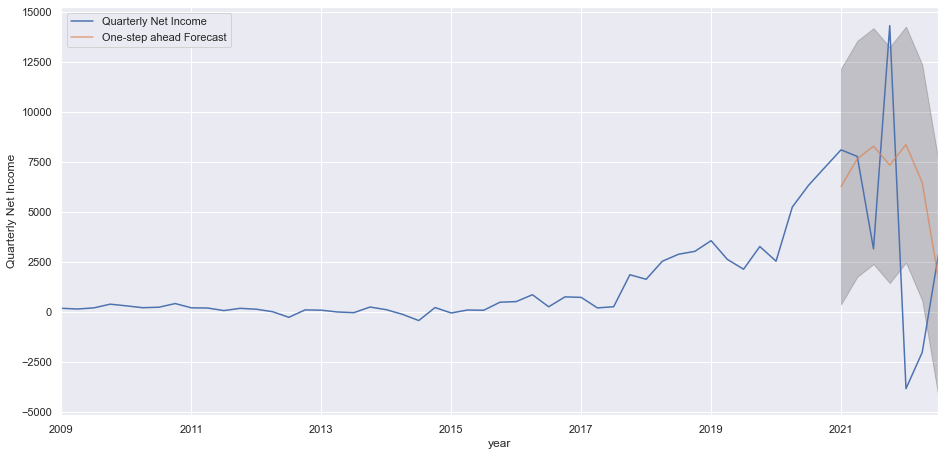

In [23]:
#Visualize the forecasting
ax = df['2009':].plot(label = 'observed')
prediction.predicted_mean.plot(ax = ax, label = 'One-step ahead Forecast', alpha = 0.7, figsize = (14, 7))
ax.fill_between(prediction_ci.index, prediction_ci.iloc[:, 0], prediction_ci.iloc[:, 1], color = 'k', alpha = 0.2)
ax.set_xlabel("year")
ax.set_ylabel('Quarterly Net Income')
plt.legend()
plt.show()

In [25]:
# Evaluation metrics are Squared Mean Error(SME) and Root Mean Squared Error(RMSE)

from sklearn.metrics import mean_squared_error

y_hat = prediction.predicted_mean
y_truth = df['2021-03-31':]
mse = mean_squared_error(y_truth,y_hat)
rmse = np.sqrt(mse)

print('The Mean Squared Error of our forecasts is', mse)
print('The Root Mean Squared Error of our forecasts is', rmse)

The Mean Squared Error of our forecasts is 43056747.27616465
The Root Mean Squared Error of our forecasts is 6561.764036916037


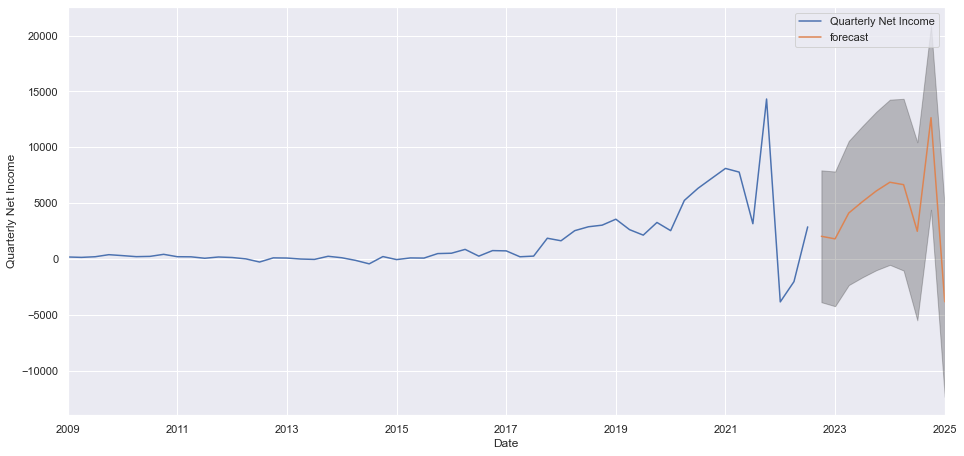

In [26]:
# forcasting for out of sample data
pred_uc = result.get_forecast(steps = 10)
pred_ci = pred_uc.conf_int()

ax = df.plot(label = 'observed', figsize = (14, 7))
pred_uc.predicted_mean.plot(ax = ax, label = 'forecast')
ax.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color = 'k', alpha = 0.25)
ax.set_xlabel('Date')
ax.set_ylabel('Quarterly Net Income')

plt.legend()
plt.show()


## **DNN MODEL**

In [27]:
def convert2matrix(data_arr, look_back):
    X, Y =[], []
    for i in range(len(data_arr)-look_back):
        d=i+look_back  
        X.append(data_arr[i:d,0])
        Y.append(data_arr[d,0])
    return np.array(X).astype('int'), np.array(Y).astype('int')

In [28]:
df=pd.read_excel('Amazon Quarterly Net Income.xlsx')

df = df.set_index('Date')


In [29]:
df1 = df
#Split data set into testing dataset and train dataset
train_size = 49
train, test =df1.values[0:train_size,:],df1.values[train_size:len(df1.values),:]
# setup look_back window 
look_back = 4
#convert dataset into right shape in order to input into the DNN
trainX, trainY = convert2matrix(train, look_back)
testX, testY = convert2matrix(test, look_back)

In [30]:
from keras.models import Sequential
from keras.layers import Dense
def model_dnn(look_back):
    model=Sequential()
    model.add(Dense(units=32, input_dim=look_back, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error',  optimizer='adam',metrics = ['mse', 'mae'])
    return model

In [31]:
model=model_dnn(look_back)
history=model.fit(trainX,trainY, epochs=500, batch_size=4, verbose=1, validation_data=(testX,testY),shuffle=False)

Epoch 1/500
12/12 [==============================] - 2s 40ms/step - loss: 3621193.2500 - mse: 3621193.2500 - mae: 1064.9882 - val_loss: 14530798.0000 - val_mse: 14530798.0000 - val_mae: 3766.7988
Epoch 2/500
12/12 [==============================] - 0s 5ms/step - loss: 3066935.7500 - mse: 3066935.7500 - mae: 969.4407 - val_loss: 16253394.0000 - val_mse: 16253394.0000 - val_mae: 3868.6843
Epoch 3/500
12/12 [==============================] - 0s 4ms/step - loss: 2573163.2500 - mse: 2573163.2500 - mae: 881.3557 - val_loss: 18571168.0000 - val_mse: 18571168.0000 - val_mae: 3979.4333
Epoch 4/500
12/12 [==============================] - 0s 4ms/step - loss: 2135605.5000 - mse: 2135605.5000 - mae: 797.1470 - val_loss: 21467206.0000 - val_mse: 21467206.0000 - val_mae: 4111.5200
Epoch 5/500
12/12 [==============================] - 0s 4ms/step - loss: 1764426.2500 - mse: 1764426.2500 - mae: 717.7985 - val_loss: 24773664.0000 - val_mse: 24773664.0000 - val_mae: 4254.0977
Epoch 6/500
12/12 [=========

12/12 [==============================] - 0s 8ms/step - loss: 291039.3438 - mse: 291039.3438 - mae: 316.0271 - val_loss: 41387332.0000 - val_mse: 41387332.0000 - val_mae: 5987.3091
Epoch 44/500
12/12 [==============================] - 0s 8ms/step - loss: 289758.7500 - mse: 289758.7500 - mae: 314.7938 - val_loss: 41257516.0000 - val_mse: 41257516.0000 - val_mae: 5957.3984
Epoch 45/500
12/12 [==============================] - 0s 8ms/step - loss: 288453.7500 - mse: 288453.7500 - mae: 313.5981 - val_loss: 41656648.0000 - val_mse: 41656648.0000 - val_mae: 5994.2354
Epoch 46/500
12/12 [==============================] - 0s 8ms/step - loss: 287306.5938 - mse: 287306.5938 - mae: 312.2227 - val_loss: 42096180.0000 - val_mse: 42096180.0000 - val_mae: 6041.3701
Epoch 47/500
12/12 [==============================] - 0s 8ms/step - loss: 286019.4375 - mse: 286019.4375 - mae: 311.4810 - val_loss: 42345420.0000 - val_mse: 42345420.0000 - val_mae: 6076.2002
Epoch 48/500
12/12 [============================

12/12 [==============================] - 0s 3ms/step - loss: 255908.9531 - mse: 255908.9531 - mae: 291.2679 - val_loss: 53083596.0000 - val_mse: 53083596.0000 - val_mae: 6961.9551
Epoch 86/500
12/12 [==============================] - 0s 3ms/step - loss: 255481.3281 - mse: 255481.3281 - mae: 290.7928 - val_loss: 53021204.0000 - val_mse: 53021204.0000 - val_mae: 6966.7451
Epoch 87/500
12/12 [==============================] - 0s 3ms/step - loss: 254935.5312 - mse: 254935.5312 - mae: 290.3846 - val_loss: 53589496.0000 - val_mse: 53589496.0000 - val_mae: 7000.6104
Epoch 88/500
12/12 [==============================] - 0s 3ms/step - loss: 254121.3281 - mse: 254121.3281 - mae: 289.8027 - val_loss: 54082100.0000 - val_mse: 54082100.0000 - val_mae: 7025.5454
Epoch 89/500
12/12 [==============================] - 0s 3ms/step - loss: 253065.1719 - mse: 253065.1719 - mae: 288.9440 - val_loss: 53998152.0000 - val_mse: 53998152.0000 - val_mae: 7025.4258
Epoch 90/500
12/12 [============================

12/12 [==============================] - 0s 3ms/step - loss: 233771.0938 - mse: 233771.0938 - mae: 275.0949 - val_loss: 61599160.0000 - val_mse: 61599160.0000 - val_mae: 7423.3999
Epoch 128/500
12/12 [==============================] - 0s 3ms/step - loss: 235014.0156 - mse: 235014.0156 - mae: 276.2464 - val_loss: 61968480.0000 - val_mse: 61968480.0000 - val_mae: 7459.5205
Epoch 129/500
12/12 [==============================] - 0s 3ms/step - loss: 232482.3125 - mse: 232482.3125 - mae: 274.6731 - val_loss: 62931736.0000 - val_mse: 62931736.0000 - val_mae: 7481.5664
Epoch 130/500
12/12 [==============================] - 0s 3ms/step - loss: 234163.7969 - mse: 234163.7969 - mae: 276.1826 - val_loss: 63021644.0000 - val_mse: 63021644.0000 - val_mae: 7516.6177
Epoch 131/500
12/12 [==============================] - 0s 3ms/step - loss: 231536.3594 - mse: 231536.3594 - mae: 274.5385 - val_loss: 62976304.0000 - val_mse: 62976304.0000 - val_mae: 7497.0576
Epoch 132/500
12/12 [=======================

12/12 [==============================] - 0s 3ms/step - loss: 216093.4844 - mse: 216093.4844 - mae: 263.6214 - val_loss: 75350912.0000 - val_mse: 75350912.0000 - val_mae: 8189.4199
Epoch 170/500
12/12 [==============================] - 0s 3ms/step - loss: 219504.6875 - mse: 219504.6875 - mae: 264.4452 - val_loss: 75935720.0000 - val_mse: 75935720.0000 - val_mae: 8261.3398
Epoch 171/500
12/12 [==============================] - 0s 3ms/step - loss: 214959.0000 - mse: 214959.0000 - mae: 261.5151 - val_loss: 77314576.0000 - val_mse: 77314576.0000 - val_mae: 8284.1543
Epoch 172/500
12/12 [==============================] - 0s 3ms/step - loss: 218279.1406 - mse: 218279.1406 - mae: 262.7877 - val_loss: 77730584.0000 - val_mse: 77730584.0000 - val_mae: 8363.0215
Epoch 173/500
12/12 [==============================] - 0s 3ms/step - loss: 213480.0156 - mse: 213480.0156 - mae: 260.4400 - val_loss: 78713160.0000 - val_mse: 78713160.0000 - val_mae: 8388.1406
Epoch 174/500
12/12 [=======================

12/12 [==============================] - 0s 4ms/step - loss: 197758.1406 - mse: 197758.1406 - mae: 253.3133 - val_loss: 91587344.0000 - val_mse: 91587344.0000 - val_mae: 8828.6191
Epoch 212/500
12/12 [==============================] - 0s 4ms/step - loss: 199671.4062 - mse: 199671.4062 - mae: 248.8500 - val_loss: 91003128.0000 - val_mse: 91003128.0000 - val_mae: 8845.2734
Epoch 213/500
12/12 [==============================] - 0s 3ms/step - loss: 195467.7969 - mse: 195467.7969 - mae: 249.7838 - val_loss: 92949296.0000 - val_mse: 92949296.0000 - val_mae: 8894.3486
Epoch 214/500
12/12 [==============================] - 0s 3ms/step - loss: 197205.8906 - mse: 197205.8906 - mae: 246.1611 - val_loss: 93687032.0000 - val_mse: 93687032.0000 - val_mae: 8978.8379
Epoch 215/500
12/12 [==============================] - 0s 3ms/step - loss: 194622.9062 - mse: 194622.9062 - mae: 248.1831 - val_loss: 95114184.0000 - val_mse: 95114184.0000 - val_mae: 9015.7041
Epoch 216/500
12/12 [=======================

Epoch 253/500
12/12 [==============================] - 0s 3ms/step - loss: 177899.1406 - mse: 177899.1406 - mae: 236.1657 - val_loss: 134496880.0000 - val_mse: 134496880.0000 - val_mae: 10763.6191
Epoch 254/500
12/12 [==============================] - 0s 3ms/step - loss: 180639.4219 - mse: 180639.4219 - mae: 235.5624 - val_loss: 133883440.0000 - val_mse: 133883440.0000 - val_mae: 10811.4629
Epoch 255/500
12/12 [==============================] - 0s 3ms/step - loss: 175377.2031 - mse: 175377.2031 - mae: 231.6825 - val_loss: 135934448.0000 - val_mse: 135934448.0000 - val_mae: 10819.0371
Epoch 256/500
12/12 [==============================] - 0s 3ms/step - loss: 177771.6250 - mse: 177771.6250 - mae: 231.0693 - val_loss: 135715920.0000 - val_mse: 135715920.0000 - val_mae: 10843.1631
Epoch 257/500
12/12 [==============================] - 0s 3ms/step - loss: 174096.4844 - mse: 174096.4844 - mae: 230.4976 - val_loss: 139344480.0000 - val_mse: 139344480.0000 - val_mae: 10950.8779
Epoch 258/500
1

Epoch 295/500
12/12 [==============================] - 0s 4ms/step - loss: 157559.0625 - mse: 157559.0625 - mae: 211.7673 - val_loss: 176430048.0000 - val_mse: 176430048.0000 - val_mae: 12096.0439
Epoch 296/500
12/12 [==============================] - 0s 4ms/step - loss: 158650.9219 - mse: 158650.9219 - mae: 212.2006 - val_loss: 176236032.0000 - val_mse: 176236032.0000 - val_mae: 12076.9297
Epoch 297/500
12/12 [==============================] - 0s 4ms/step - loss: 156945.3125 - mse: 156945.3125 - mae: 213.0318 - val_loss: 177541360.0000 - val_mse: 177541360.0000 - val_mae: 12072.9600
Epoch 298/500
12/12 [==============================] - 0s 4ms/step - loss: 159248.8438 - mse: 159248.8438 - mae: 213.9913 - val_loss: 177647968.0000 - val_mse: 177647968.0000 - val_mae: 12113.8184
Epoch 299/500
12/12 [==============================] - 0s 4ms/step - loss: 156635.1250 - mse: 156635.1250 - mae: 213.3540 - val_loss: 180068720.0000 - val_mse: 180068720.0000 - val_mae: 12144.2480
Epoch 300/500
1

Epoch 337/500
12/12 [==============================] - 0s 3ms/step - loss: 144247.2500 - mse: 144247.2500 - mae: 197.3936 - val_loss: 213835552.0000 - val_mse: 213835552.0000 - val_mae: 12971.9561
Epoch 338/500
12/12 [==============================] - 0s 3ms/step - loss: 143391.6094 - mse: 143391.6094 - mae: 198.6389 - val_loss: 214060544.0000 - val_mse: 214060544.0000 - val_mae: 12934.1660
Epoch 339/500
12/12 [==============================] - 0s 3ms/step - loss: 144085.7188 - mse: 144085.7188 - mae: 198.4694 - val_loss: 214744768.0000 - val_mse: 214744768.0000 - val_mae: 12984.1387
Epoch 340/500
12/12 [==============================] - 0s 3ms/step - loss: 142745.0625 - mse: 142745.0625 - mae: 197.7258 - val_loss: 217818320.0000 - val_mse: 217818320.0000 - val_mae: 13033.8135
Epoch 341/500
12/12 [==============================] - 0s 3ms/step - loss: 143331.4375 - mse: 143331.4375 - mae: 196.8079 - val_loss: 217134512.0000 - val_mse: 217134512.0000 - val_mae: 12998.4102
Epoch 342/500
1

Epoch 379/500
12/12 [==============================] - 0s 5ms/step - loss: 137414.5000 - mse: 137414.5000 - mae: 189.6298 - val_loss: 241614656.0000 - val_mse: 241614656.0000 - val_mae: 13046.6621
Epoch 380/500
12/12 [==============================] - 0s 3ms/step - loss: 135183.5312 - mse: 135183.5312 - mae: 188.2158 - val_loss: 243369104.0000 - val_mse: 243369104.0000 - val_mae: 13104.7891
Epoch 381/500
12/12 [==============================] - 0s 4ms/step - loss: 134708.1094 - mse: 134708.1094 - mae: 188.6831 - val_loss: 244950640.0000 - val_mse: 244950640.0000 - val_mae: 13159.6270
Epoch 382/500
12/12 [==============================] - 0s 4ms/step - loss: 134098.0469 - mse: 134098.0469 - mae: 187.0112 - val_loss: 245386304.0000 - val_mse: 245386304.0000 - val_mae: 13182.5020
Epoch 383/500
12/12 [==============================] - 0s 3ms/step - loss: 133511.1875 - mse: 133511.1875 - mae: 186.9601 - val_loss: 246737584.0000 - val_mse: 246737584.0000 - val_mae: 13217.1172
Epoch 384/500
1

Epoch 421/500
12/12 [==============================] - 0s 4ms/step - loss: 129603.0234 - mse: 129603.0234 - mae: 198.4058 - val_loss: 293008256.0000 - val_mse: 293008256.0000 - val_mae: 13770.4531
Epoch 422/500
12/12 [==============================] - 0s 4ms/step - loss: 143237.4688 - mse: 143237.4688 - mae: 216.2749 - val_loss: 289136896.0000 - val_mse: 289136896.0000 - val_mae: 13553.5547
Epoch 423/500
12/12 [==============================] - 0s 4ms/step - loss: 185434.9062 - mse: 185434.9062 - mae: 264.9290 - val_loss: 292358304.0000 - val_mse: 292358304.0000 - val_mae: 13389.8574
Epoch 424/500
12/12 [==============================] - 0s 4ms/step - loss: 198605.9375 - mse: 198605.9375 - mae: 262.2156 - val_loss: 270154624.0000 - val_mse: 270154624.0000 - val_mae: 13256.4873
Epoch 425/500
12/12 [==============================] - 0s 3ms/step - loss: 150947.1406 - mse: 150947.1406 - mae: 233.4598 - val_loss: 292306112.0000 - val_mse: 292306112.0000 - val_mae: 13283.2627
Epoch 426/500
1

Epoch 463/500
12/12 [==============================] - 0s 4ms/step - loss: 125035.2969 - mse: 125035.2969 - mae: 199.1600 - val_loss: 317034144.0000 - val_mse: 317034144.0000 - val_mae: 13633.2031
Epoch 464/500
12/12 [==============================] - 0s 3ms/step - loss: 129463.1250 - mse: 129463.1250 - mae: 199.6916 - val_loss: 310220256.0000 - val_mse: 310220256.0000 - val_mae: 13641.9824
Epoch 465/500
12/12 [==============================] - 0s 3ms/step - loss: 126767.4531 - mse: 126767.4531 - mae: 201.8765 - val_loss: 325147968.0000 - val_mse: 325147968.0000 - val_mae: 13777.6504
Epoch 466/500
12/12 [==============================] - 0s 3ms/step - loss: 129541.5469 - mse: 129541.5469 - mae: 199.6635 - val_loss: 314255520.0000 - val_mse: 314255520.0000 - val_mae: 13741.3730
Epoch 467/500
12/12 [==============================] - 0s 3ms/step - loss: 122662.7969 - mse: 122662.7969 - mae: 195.3071 - val_loss: 323014240.0000 - val_mse: 323014240.0000 - val_mae: 13755.2363
Epoch 468/500
1

In [32]:
def model_loss(history):
    plt.figure(figsize=(8,4))
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Test Loss')
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epochs')
    plt.legend(loc='upper right')
    plt.show();

In [33]:
train_score = model.evaluate(trainX, trainY, verbose=0)
print('Train Root Mean Squared Error(RMSE): %.2f; Train Mean Absolute Error(MAE) : %.2f ' 
% (np.sqrt(train_score[1]), train_score[2]))
test_score = model.evaluate(testX, testY, verbose=0)
print(train_score)
print(test_score)
print('Test Root Mean Squared Error(RMSE): %.2f; Test Mean Absolute Error(MAE) : %.2f ' 
% (np.sqrt(test_score[1]), test_score[2]))

Train Root Mean Squared Error(RMSE): 325.12; Train Mean Absolute Error(MAE) : 164.25 
[105702.1796875, 105702.1796875, 164.24574279785156]
[336099744.0, 336099744.0, 13721.6064453125]
Test Root Mean Squared Error(RMSE): 18333.02; Test Mean Absolute Error(MAE) : 13721.61 


In [34]:
 def prediction_plot(testY, test_predict):
      len_prediction=[x for x in range(len(testY))]
      plt.figure(figsize=(8,4))
      plt.plot(len_prediction, testY[:8], marker='.', label="actual")
      plt.plot(len_prediction, test_predict[:8], 'r', label="prediction")
      plt.tight_layout()
      sns.despine(top=True)
      plt.subplots_adjust(left=0.07)
      plt.ylabel('Ads Daily Spend', size=15)
      plt.xlabel('Time step', size=15)
      plt.legend(fontsize=15)
      plt.show();

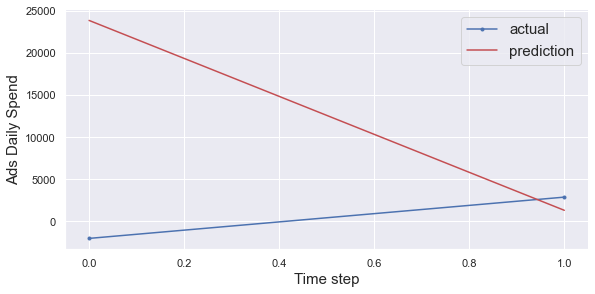

In [35]:
test_predict = model.predict(testX)
prediction_plot(testY, test_predict)

## **GRU and BiLSTM Models** 

In [36]:
df=pd.read_excel('Amazon Quarterly Net Income.xlsx')
df.head()

,Date,Quarterly Net Income
0,2009-03-31,177
1,2009-06-30,142
2,2009-09-30,199
3,2009-12-31,384
4,2010-03-31,299


In [37]:
df = df.set_index('Date')
df.head()

,Quarterly Net Income
Date,
2009-03-31,177
2009-06-30,142
2009-09-30,199
2009-12-31,384
2010-03-31,299


In [38]:
# Split train data and test data
train_size = int(len(df)*0.8)

train_data = df.iloc[:train_size]
test_data = df.iloc[train_size:]

In [39]:
scaler = MinMaxScaler().fit(train_data)
train_scaled = scaler.transform(train_data)
test_scaled = scaler.transform(test_data)

In [40]:
# Create input dataset
def create_dataset (X, look_back = 1):
    Xs, ys = [], []
 
    for i in range(len(X)-look_back):
        v = X[i:i+look_back]
        Xs.append(v)
        ys.append(X[i+look_back])
 
    return np.array(Xs), np.array(ys)
LOOK_BACK = 4
X_train, y_train = create_dataset(train_scaled,LOOK_BACK)
X_test, y_test = create_dataset(test_scaled,LOOK_BACK)
# Print data shape
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape) 
print('y_test.shape: ', y_test.shape)

X_train.shape:  (40, 4, 1)
y_train.shape:  (40, 1)
X_test.shape:  (7, 4, 1)
y_test.shape:  (7, 1)


In [41]:
# Create BiLSTM model
def create_bilstm(units):
    model = Sequential()
    # Input layer
    model.add(Bidirectional(
              LSTM(units = units, return_sequences=True), 
              input_shape=(X_train.shape[1], X_train.shape[2])))
    # Hidden layer
    model.add(Bidirectional(LSTM(units = units)))
    model.add(Dense(1))
    #Compile model
    model.compile(optimizer='adam',loss='mse')
    return model
model_bilstm = create_bilstm(64)
# Create GRU model
def create_gru(units):
    model = Sequential()
    # Input layer
    model.add(GRU (units = units, return_sequences = True, 
    input_shape = [X_train.shape[1], X_train.shape[2]]))
    model.add(Dropout(0.2)) 
    # Hidden layer
    model.add(GRU(units = units)) 
    model.add(Dropout(0.2))
    model.add(Dense(units = 1)) 
    #Compile model
    model.compile(optimizer='adam',loss='mse')
    return model
model_gru = create_gru(64)

In [42]:
def fit_model(model):
    early_stop = keras.callbacks.EarlyStopping(monitor = 'val_loss',
                                               patience = 10)
    history = model.fit(X_train, y_train, epochs = 100,  
                        validation_split = 0.2,
                        batch_size = 16, shuffle = False, 
                        callbacks = [early_stop])
    return history
history_gru = fit_model(model_gru)

Epoch 1/100
2/2 [==============================] - 4s 844ms/step - loss: 0.0311 - val_loss: 0.4045
Epoch 2/100
2/2 [==============================] - 0s 31ms/step - loss: 0.0138 - val_loss: 0.2520
Epoch 3/100
2/2 [==============================] - 0s 32ms/step - loss: 0.0084 - val_loss: 0.1504
Epoch 4/100
2/2 [==============================] - 0s 29ms/step - loss: 0.0095 - val_loss: 0.1066
Epoch 5/100
2/2 [==============================] - 0s 30ms/step - loss: 0.0147 - val_loss: 0.1066
Epoch 6/100
2/2 [==============================] - 0s 39ms/step - loss: 0.0124 - val_loss: 0.1293
Epoch 7/100
2/2 [==============================] - 0s 38ms/step - loss: 0.0100 - val_loss: 0.1597
Epoch 8/100
2/2 [==============================] - 0s 41ms/step - loss: 0.0083 - val_loss: 0.1866
Epoch 9/100
2/2 [==============================] - 0s 38ms/step - loss: 0.0092 - val_loss: 0.2030
Epoch 10/100
2/2 [==============================] - 0s 49ms/step - loss: 0.0095 - val_loss: 0.2062
Epoch 11/100
2/2 [

In [43]:
history_bilstm = fit_model(model_bilstm)

Epoch 1/100
2/2 [==============================] - 6s 2s/step - loss: 0.0349 - val_loss: 0.5041
Epoch 2/100
2/2 [==============================] - 0s 39ms/step - loss: 0.0217 - val_loss: 0.3704
Epoch 3/100
2/2 [==============================] - 0s 32ms/step - loss: 0.0125 - val_loss: 0.2542
Epoch 4/100
2/2 [==============================] - 0s 30ms/step - loss: 0.0078 - val_loss: 0.1630
Epoch 5/100
2/2 [==============================] - 0s 31ms/step - loss: 0.0081 - val_loss: 0.1121
Epoch 6/100
2/2 [==============================] - 0s 29ms/step - loss: 0.0106 - val_loss: 0.1006
Epoch 7/100
2/2 [==============================] - 0s 32ms/step - loss: 0.0110 - val_loss: 0.1120
Epoch 8/100
2/2 [==============================] - 0s 33ms/step - loss: 0.0096 - val_loss: 0.1352
Epoch 9/100
2/2 [==============================] - 0s 28ms/step - loss: 0.0083 - val_loss: 0.1611
Epoch 10/100
2/2 [==============================] - 0s 37ms/step - loss: 0.0079 - val_loss: 0.1825
Epoch 11/100
2/2 [===

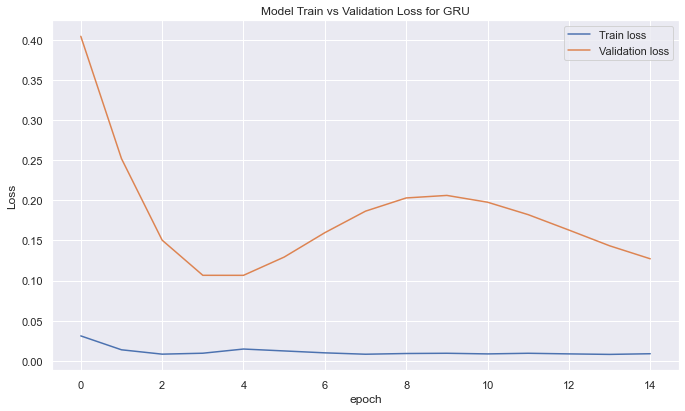

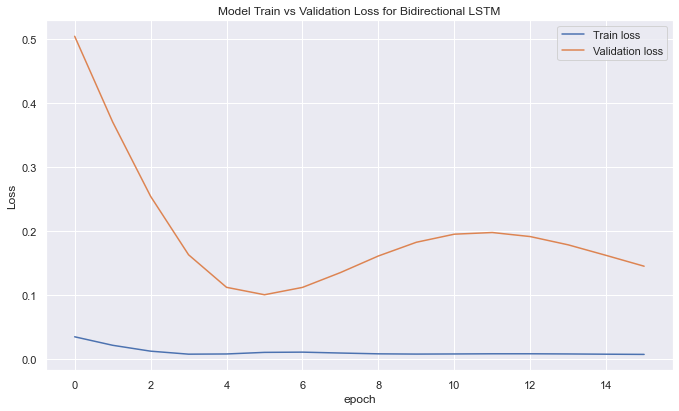

In [44]:
def plot_loss (history, model_name):
    plt.figure(figsize = (10, 6))
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Train vs Validation Loss for ' + model_name)
    plt.ylabel('Loss')
    plt.xlabel('epoch')
    plt.legend(['Train loss', 'Validation loss'], loc='upper right')
 
plot_loss (history_gru, 'GRU')
plot_loss (history_bilstm, 'Bidirectional LSTM')

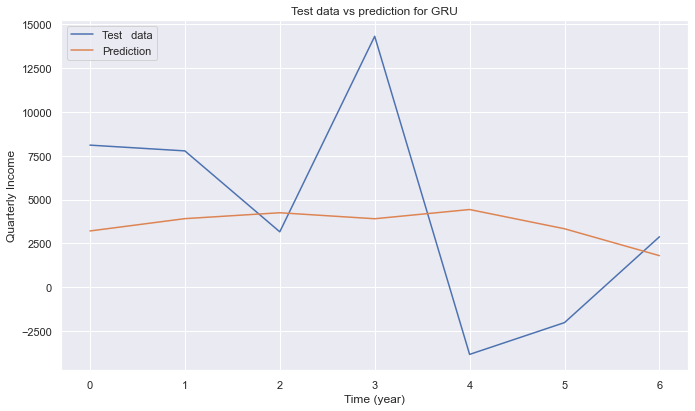

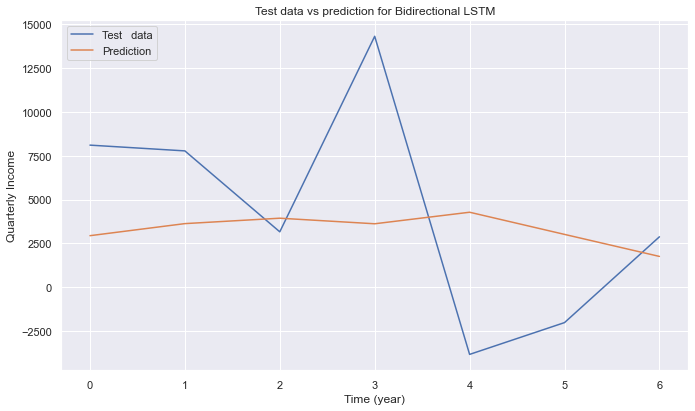

In [45]:
# Make prediction
def prediction(model):
    prediction = model.predict(X_test)
    prediction = scaler.inverse_transform(prediction)
    return prediction
prediction_gru = prediction(model_gru)
prediction_bilstm = prediction(model_bilstm)
# Plot test data vs prediction
def plot_future(prediction, model_name, y_test):
    plt.figure(figsize=(10, 6))
    range_future = len(prediction)
    plt.plot(np.arange(range_future), np.array(scaler.inverse_transform(y_test)), 
             label='Test   data')
    plt.plot(np.arange(range_future), 
             np.array(prediction),label='Prediction')
    plt.title('Test data vs prediction for ' + model_name)
    plt.legend(loc='upper left')
    plt.xlabel('Time (year)')
    plt.ylabel('Quarterly Income')
 
plot_future(prediction_gru, 'GRU', y_test)
plot_future(prediction_bilstm, 'Bidirectional LSTM', y_test)

In [46]:
def evaluate_prediction(predictions, actual, model_name):
    errors = predictions - actual
    mse = np.square(errors).mean()
    rmse = np.sqrt(mse)
    mae = np.abs(errors).mean()
    print(model_name + ':')
    print('Mean Absolute Error: {:.4f}'.format(mae))
    print('Root Mean Square Error: {:.4f}'.format(rmse))
    print('')
evaluate_prediction(prediction_gru, scaler.inverse_transform(y_test), 'GRU')
evaluate_prediction(prediction_bilstm, scaler.inverse_transform(y_test), 'Bidirectional LSTM')

GRU:
Mean Absolute Error: 4998.6921
Root Mean Square Error: 5941.3557

Bidirectional LSTM:
Mean Absolute Error: 5012.3960
Root Mean Square Error: 5997.4695



In [47]:
def evaluate_prediction(predictions, actual, model_name):
    errors = predictions - actual
    mse = np.square(errors).mean()
    rmse = np.sqrt(mse)
    mae = np.abs(errors).mean()
    print(model_name + ':')
    print('Mean Absolute Error: {:.4f}'.format(mae))
    print('Root Mean Square Error: {:.4f}'.format(rmse))
    print('')
evaluate_prediction(scaler.transform(prediction_gru), y_test, 'GRU')
evaluate_prediction(scaler.transform(prediction_bilstm), y_test, 'Bidirectional LSTM')

GRU:
Mean Absolute Error: 1.2503
Root Mean Square Error: 1.4861

Bidirectional LSTM:
Mean Absolute Error: 1.2537
Root Mean Square Error: 1.5001



R:\Anaconda\envs\general\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
R:\Anaconda\envs\general\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
